In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df_X = pd.read_csv('properties_2016.csv', index_col=0)
df_y = pd.read_csv('train_2016_v2.csv')

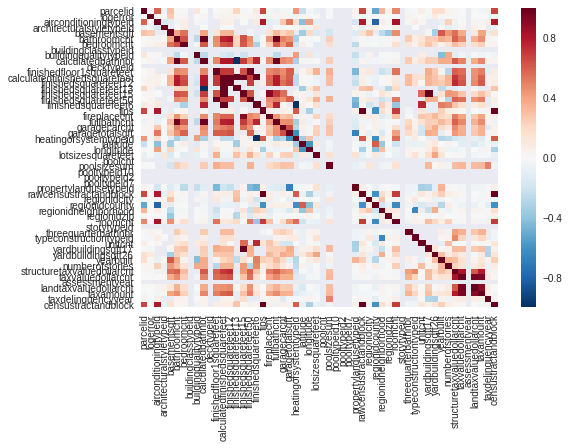

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15        

In [10]:
zillow_df = df_y.join(df_X, on='parcelid',how='inner',lsuffix='copy')
zillow_df.head()



In [45]:
# sns.heatmap(zillow_df.corr())
# plt.show()

# plt.hist(zillow_df.logerror.values, bins=100, range=(-1,1))
# plt.show()

#zillow_df.info()
dropped_cols = ['architecturalstyletypeid', 
                'basementsqft', 
                'buildingclasstypeid',
                'decktypeid',
                'finishedfloor1squarefeet',
                'finishedsquarefeet6',
                'finishedsquarefeet12',
                'finishedsquarefeet13',
                'finishedsquarefeet15',
                'finishedsquarefeet50',
                'fips',
                'pooltypeid10',
                'pooltypeid2',
                'pooltypeid7',
                'storytypeid',
                'typeconstructiontypeid',
                'propertyzoningdesc',
                'taxdelinquencyyear',
                'censustractandblock',
                'propertycountylandusecode',
                'transactiondate'
               ]

zillow = zillow_df.drop(dropped_cols, axis=1)
print(zillow.iloc[:,0:15].head())
zillow.iloc[:,15:].head()


   parcelid  logerror  airconditioningtypeid  bathroomcnt  bedroomcnt  \
0  11016594    0.0276                    1.0          2.0         3.0   
1  14366692   -0.1684                    NaN          3.5         4.0   
2  12098116   -0.0040                    1.0          3.0         2.0   
3  12643413    0.0218                    1.0          2.0         2.0   
4  14432541   -0.0050                    NaN          2.5         4.0   

   buildingqualitytypeid  calculatedbathnbr  calculatedfinishedsquarefeet  \
0                    4.0                2.0                        1684.0   
1                    NaN                3.5                        2263.0   
2                    4.0                3.0                        2217.0   
3                    4.0                2.0                         839.0   
4                    NaN                2.5                        2283.0   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft hashottuborspa  \
0           NaN     

,longitude,lotsizesquarefeet,poolcnt,poolsizesum,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,...,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag
0,-118488536.0,7528.0,NaN,NaN,261.0,6.037107e+07,12447.0,3101.0,31817.0,96370.0,...,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN
1,-117677556.0,3643.0,NaN,NaN,261.0,6.059052e+07,32380.0,1286.0,NaN,96962.0,...,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,-118175032.0,11423.0,NaN,NaN,261.0,6.037464e+07,47019.0,3101.0,275411.0,96293.0,...,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN
3,-118309000.0,70859.0,NaN,NaN,266.0,6.037296e+07,12447.0,3101.0,54300.0,96222.0,...,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN
4,-117700234.0,6000.0,1.0,NaN,261.0,6.059042e+07,17686.0,1286.0,NaN,96961.0,...,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN


In [53]:
zillow.hashottuborspa.unique() #nan -> 0, True -> 1
zillow.fireplaceflag.unique() #nan -> 0, True -> 1
zillow.taxdelinquencyflag.unique() #nan -> 0, 'Y' -> 1

zill = zillow.fillna(value=0)
zill.loc[:,'hashottuborspa'] = zill.loc[:,'hashottuborspa'].apply(lambda x: 1.0 if x == True else float(x))
zill.loc[:,'fireplaceflag'] = zill.loc[:,'fireplaceflag'].apply(lambda x: 1.0 if x == True else float(x))
zill.loc[:,'taxdelinquencyflag'] = zill.loc[:,'taxdelinquencyflag'].apply(lambda x: 1.0 if x == 'Y' else float(x))
zill.head()
zill.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 39 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
airconditioningtypeid           90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingqualitytypeid           90275 non-null float64
calculatedbathnbr               90275 non-null float64
calculatedfinishedsquarefeet    90275 non-null float64
fireplacecnt                    90275 non-null float64
fullbathcnt                     90275 non-null float64
garagecarcnt                    90275 non-null float64
garagetotalsqft                 90275 non-null float64
hashottuborspa                  90275 non-null float64
heatingorsystemtypeid           90275 non-null float64
latitude                        90275 non-null float64
longitude                       90275 non-null float64
lotsizesquare

In [ ]:
'''TO DO
Get dummies on all classified data
Do some visualizations
1)Grid search on linear regression
2)Grid search on random forest
3)SVR
4)Adaboost
5)Dense nueral network - try dif hyperparams
'''